In [165]:
import os
import sys

sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname("../bpepi/bpepi"))))
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname("../bpepi"))))

import bpepi
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [166]:
import networkx as nx
import numpy as np

In [167]:
import sys
sys.path.insert(0,'../Analysis')
sys.path.insert(0,'../bpepi')

In [168]:
from gen import simulate_one_detSIR
from bpepi.Modules import fg

## Tree

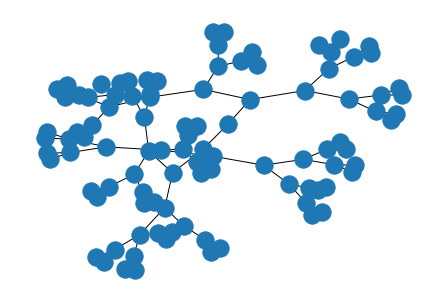

In [173]:
N=100
d=2
lam=1.
delta=0.
G=nx.full_rary_tree(d,N)
for (u,v) in G.edges():
    G.edges[u,v]['lambda'] = lam
if (N<500) : nx.draw(G)

In [174]:
snn = simulate_one_detSIR(G, s_type = "delta", S = 0.0, mask = ["SI"], T_max=100)

No sources... adding a single random source


In [175]:
T = len(snn) - 1

In [176]:
from gen import generate_contacts

In [177]:
contacts = generate_contacts(G,T,lam)

#### No observations

In [178]:
fg_ = fg.FactorGraph(N,T,contacts,[],delta=1/N)

In [179]:
fg_.update(maxit=1000)

(13, 1.817990202823694e-15)

In [180]:
marg = fg_.marginals()

array([1.00000000e-02, 2.94039900e-02, 4.70787625e-02, 8.73486236e-02,
       1.50439575e-01, 2.23685399e-01, 6.71475714e-02, 1.88637376e-02,
       0.00000000e+00, 5.18213274e-15, 3.31882302e-16, 9.48235148e-16,
       3.66032341e-01])

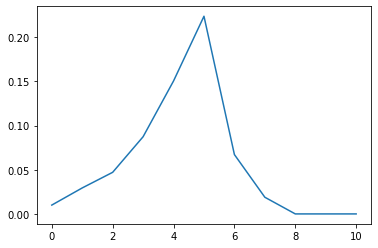

In [181]:
plt.plot(marg[1][:-2])
marg[1]

In [182]:
np.exp(-1)

0.36787944117144233

In [183]:
from Analysis.measures import ti_star, ti_inferred, SE, MSE

In [184]:
se_ = SE(ti_star(snn),ti_inferred(marg))
se_

7.2569193545231405

In [185]:
mse_ = MSE(marg,ti_inferred(marg))
mse_

10.89102927908467

#### One observation

In [186]:
snn[0][54]

0

##### $t_i=0$

In [187]:
fg_ = fg.FactorGraph(N,T,contacts,[[54,1,0]],delta=1/N)

In [188]:
fg_.update(maxit=1000)

(12, 1.9220736113823023e-15)

In [189]:
marg = fg_.marginals()

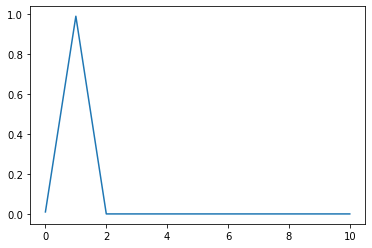

In [163]:
plt.plot(marg[26][:-2])

In [157]:
from Analysis.measures import ti_star, ti_inferred, SE, MSE

In [158]:
se_ = SE(ti_star(snn),ti_inferred(marg))
se_

2.8323292132542877

In [159]:
mse_ = MSE(marg,ti_inferred(marg))
mse_

4.91978175072287

# Test files

In [266]:
from XZtoDF import data_to_dict
import lzma, pickle
#load_dir = './data_frames/'
load_dir = './'

In [406]:
#filename="SI_Conv/DF_20221118-130708_39.xz"
filename="DF_20221121-172552_411.xz"
with lzma.open(load_dir + filename, "rb") as f:
    data = pickle.load(f)

In [407]:
data.iloc[:,-2:]

,$\delta R_{SE}$,ConvChecks
0,-1.022215e-15,"[[10, 3.654498286626007e-08], [20, 1.447268011..."
1,-9.212717e-14,"[[10, 0.9642857142857416], [20, 0.031153270172..."


In [413]:
data["ConvChecks"].values[2]

IndexError: index 2 is out of bounds for axis 0 with size 2

In [414]:
a = np.asarray(data["ConvChecks"].values)

In [417]:
a.transpose()[1]

[[10, 0.9642857142857416],
 [20, 0.031153270172149763],
 [30, 0.004702370919965809],
 [40, 2.5296891078413486e-07],
 [50, 1.6387754045790737e-07],
 [60, 9.454650377101886e-07],
 [64, 8.265674256158206e-10]]